In [17]:
include("install_pkg.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %=====>                                   ]  11.7 %]  23.9 %>                             ]  26.2 %                         ]  36.9 %Fetching: [=============================>           ]  70.8 %>      ]  83.1 %.2 % ]  96.4 % Resolving package versions...
 Installed Libtiff_jll ────── v4.0.10+1
 Installed Pango_jll ──────── v1.42.4+8
 Installed XML2_jll ───────── v2.9.9+4
 Installed at_spi2_core_jll ─ v2.34.0+1
 Installed OpenBLAS_jll ───── v0.3.9+2
 Installed FillArrays ─────── v0.8.7
 Installed HarfBuzz_jll ───── v2.6.1+5
 Installed BinDeps ────────── v1.0.1
 Installed PlotThemes ─────── v1.0.3
 Installed CodeTracking ───── v0.5.9
 Installed AbstractTrees ──── v0.3.3
 Installed XSLT_jll ───────── v1.1.33+2
 Installed CSTParser ──────── v2.2.1
 Installed DataStructures ─── v0.17.12
 Installed ZeroMQ_jl

In [2]:
include("src/main.jl")

using ProgressBars
using HDF5, JLD
using DelimitedFiles
using Dates
using ProfileView
using Profile


Id = SparseArrays.I

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/ayedm/.julia/packages/PyPlot/4wzW1/src/init.jl:192


LinearAlgebra.UniformScaling{Bool}
true*I

In [6]:
results_folder = "results/data_for_kn_pl_medium/fixed sigma"

results_folder = "results/amazon_10000/free sigma"

chains_names = first(walkdir(results_folder))[2]

3-element Array{String,1}:
 "20-04-20_17-49-12"
 "20-04-20_17-49-58"
 "20-04-20_17-50-01"

In [7]:
# Load variables of each chain

n_active_list = Dict()
kappa_list = Dict()
sigma_list = Dict()
tau_list = Dict()
alpha_list = Dict()
beta_list = Dict()

M = length(chains_names)
for m in 1:M
  load_dir = string(results_folder,"/",chains_names[m],"/variables/")
  variables = load(string(load_dir,"variables.jld"))
  n_active_list[m] = variables["n_active_list"]
  kappa_list[m] = variables["kappa_list"]
  sigma_list[m] = variables["sigma_list"]
  tau_list[m] = variables["tau_list"]
  alpha_list[m] = variables["alpha_list"]
  beta_list[m] = variables["beta_list"]
end

In [8]:
# Make sure that all chains have same number of iterations
T = length(n_active_list[1])
print(string("All chains have ", T, " iterations = ",
            all([T == length(chain) for chain in values(n_active_list)])))

All chains have 10000 iterations = true

In [9]:
# Concatenate values after burn
burn = Int(T/2)

kn_array = vcat([chain[burn:T] for chain in values(n_active_list)]...);
sigma_array = vcat([chain[burn:T] for chain in values(sigma_list)]...);
alpha_array = vcat([chain[burn:T] for chain in values(alpha_list)]...);

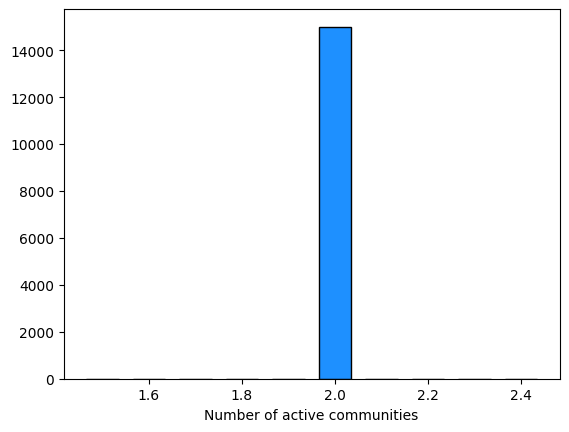

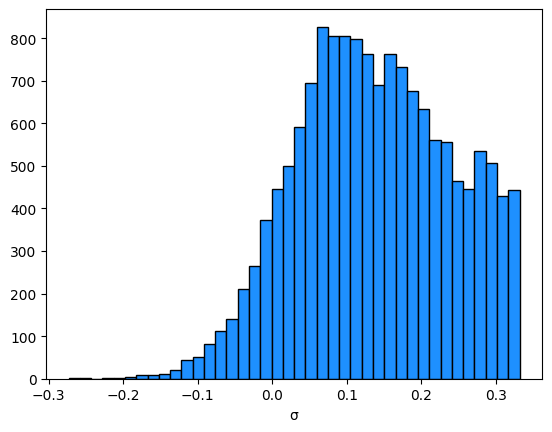

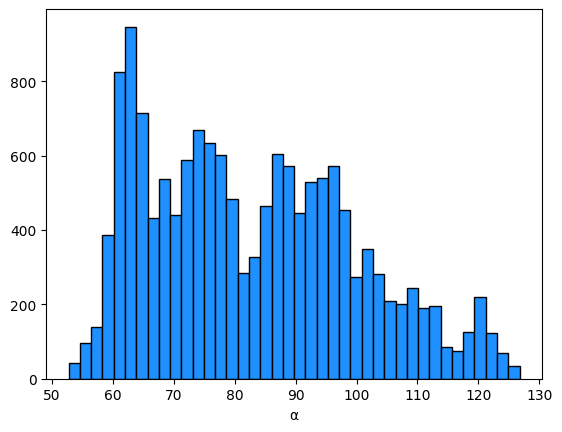

PyObject Text(0.5, 24.0, 'α')

In [12]:
# Plot histograms
# Small

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

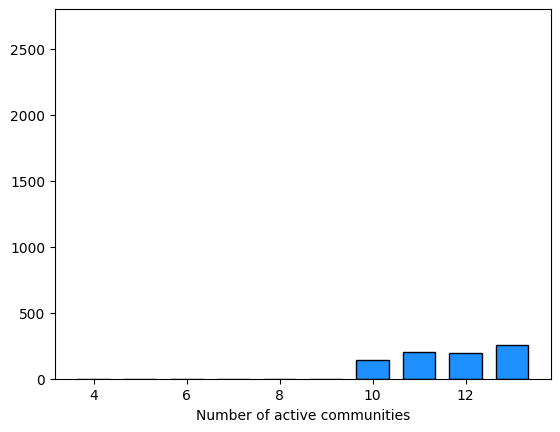

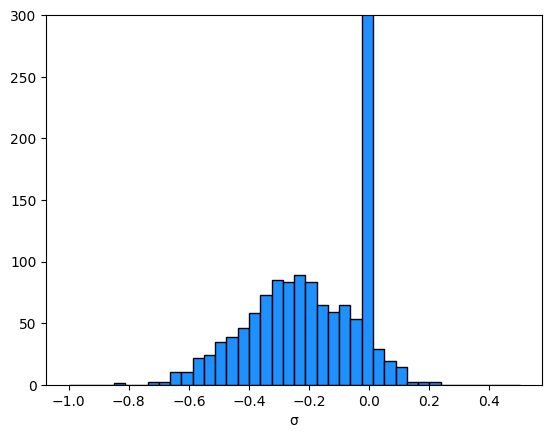

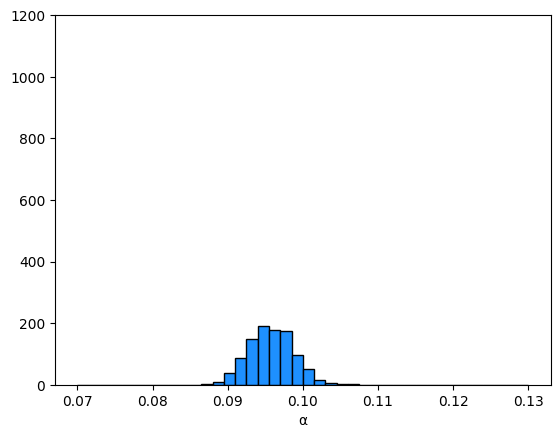

PyObject Text(0.5, 24.0, 'α')

In [18]:
# Plot histograms
# Medium

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

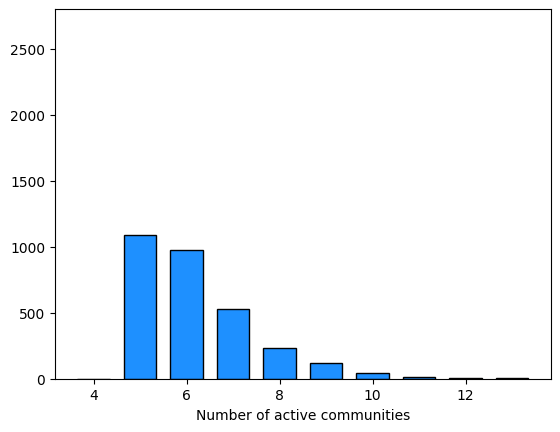

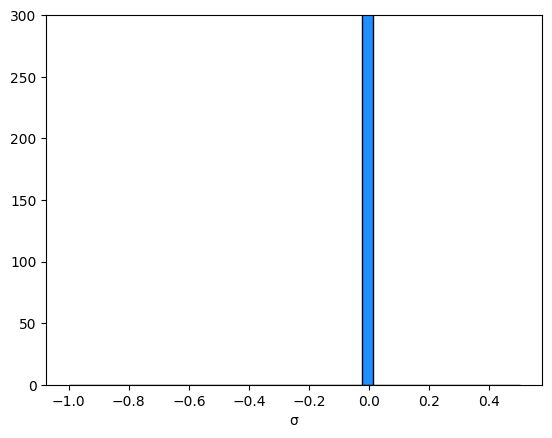

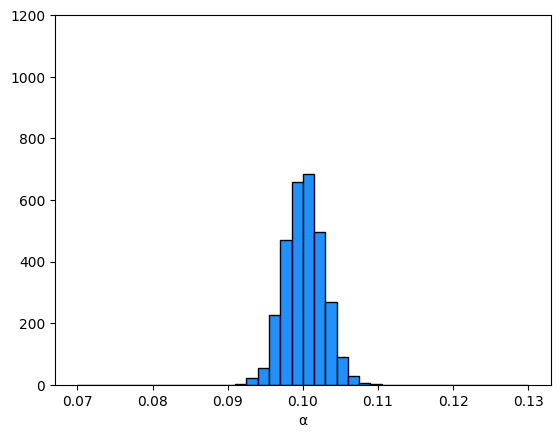

PyObject Text(0.5, 24.0, 'α')

In [8]:
# Plot histograms
# Large

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")